# Sliced Mutual Information

In [1]:
import numpy as np
from tqdm import tqdm

In [2]:
from mutinfo.estimators.knn import KSG
from mutinfo.estimators.smi import SMI

estimator = SMI(KSG(), projection_dim=2)

In [3]:
from utils.plots import *

In [4]:
MI_grid = np.linspace(0.0, 10.0, 11)
n_samples = 1000
n_runs = 10

X_dimension = 10
Y_dimension = 10
dimension = max(X_dimension, Y_dimension)

In [5]:
font = {'size' : 16}
matplotlib.rc('font', **font)

In [6]:
def run_tests(distribution_factory, estimator, MI_grid, n_samples, n_runs):
    estimated_MI = []

    for mutual_information in tqdm(MI_grid):
        current_run_estimates = []
        for run in range(n_runs):
            random_variable = distribution_factory(mutual_information)
            x, y = random_variable.rvs(n_samples)
        
            current_run_estimates.append(estimator(x, y))
        
        current_run_estimates = np.array(current_run_estimates)
        mean = np.mean(current_run_estimates)
        std = np.std(current_run_estimates) / np.sqrt(n_runs)
        
        estimated_MI.append([mean, 3*std])
    
    estimated_MI = np.array(estimated_MI)
    return estimated_MI

In [7]:
from mutinfo.distributions.base import CorrelatedNormal, CorrelatedUniform, CorrelatedStudent, SmoothedUniform

In [8]:
estimated_MI = run_tests(
    lambda mutual_information : CorrelatedNormal(mutual_information, X_dimension, Y_dimension),
    estimator=estimator,
    MI_grid=MI_grid,
    n_samples=n_samples,
    n_runs=n_runs
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [02:09<00:00, 11.80s/it]


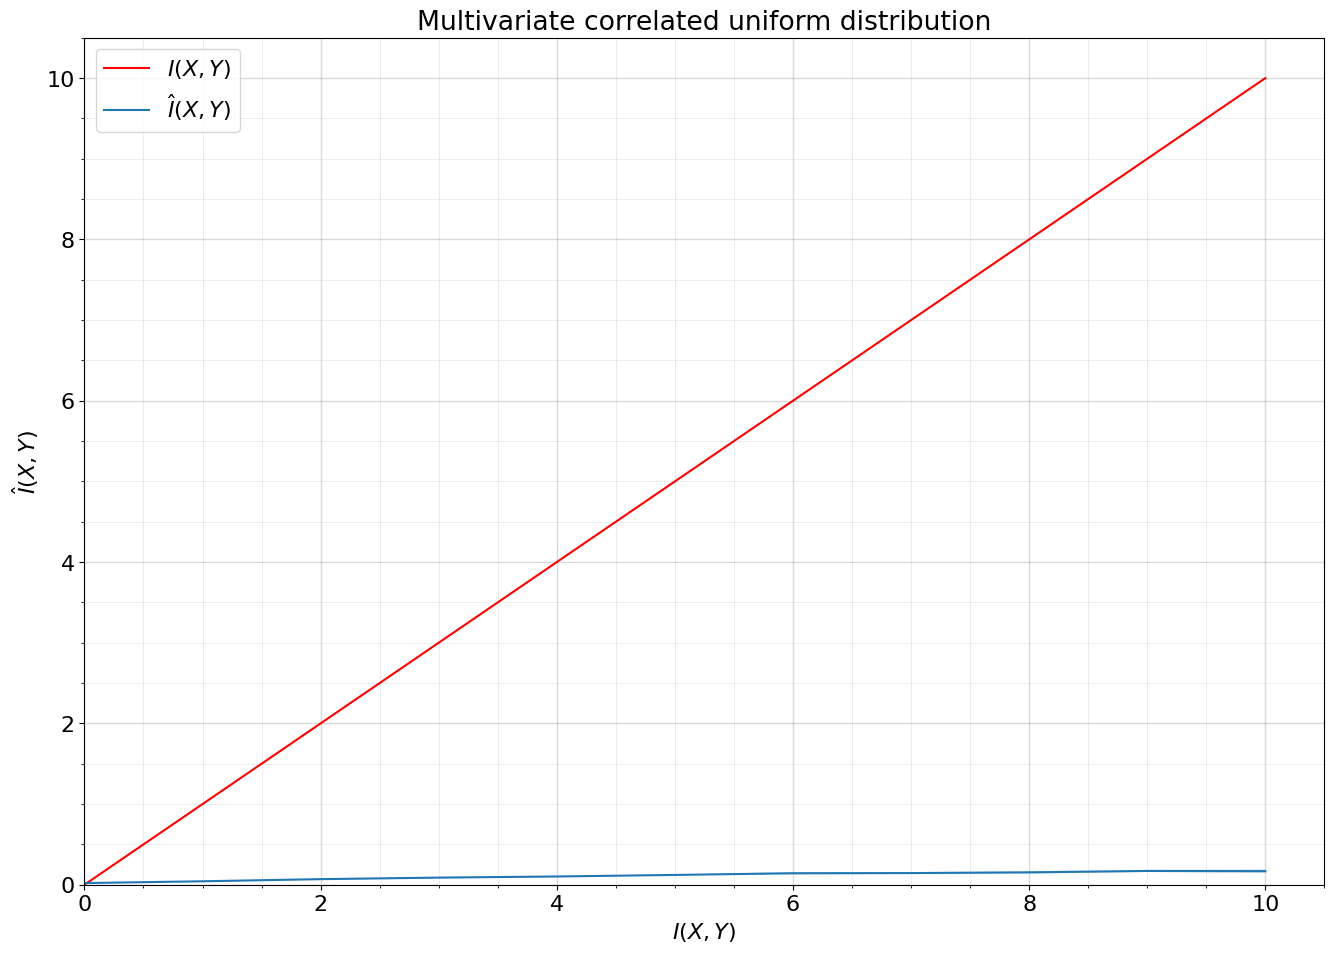

In [9]:
plot_estimated_MI(MI_grid, estimated_MI, "Multivariate correlated uniform distribution")